In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
%matplotlib inline

In [2]:
#파일 읽어오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 각 데이터 head 및 결측치 확인 

In [266]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [268]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#위 방법으로는 결측치가 있는 특성을 확인하기 어려움
train_feats = train.columns

In [10]:
#결측치 확인
train_feats_w_null = []
for col in train_feats:
    if train[col].isnull().sum() != 0:
        train_feats_w_null.append(col)

In [11]:
train_feats_w_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [272]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [273]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
#test set 결측지 확인 
test_cols = test.columns

test_cols_w_null = []
for w in test_cols:
    if test[w].isnull().sum() != 0:
        test_cols_w_null.append(w)

In [7]:
test_cols_w_null

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [276]:
set(test_cols_w_null)-set(cols_w_null) #이들을 어떻게 처리할지 고민해야할듯 

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'TotalBsmtSF',
 'Utilities'}

In [277]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [13]:
#수치형 변수와 병목형 변수 분리
numerical_feats = train.dtypes[train.dtypes !='object'].index
categorical_feats = train.dtypes[train.dtypes =='object'].index

print(f"numerical features: {len(numerical_feats)}, categorical features:  {len(categorical_feats)}")

numerical features: 38, categorical features:  43


In [14]:
#수치형 특성에서 Id와 SalePrice를 제외
numerical_feats = numerical_feats.drop(['Id', 'SalePrice'])

In [279]:
#이상치 탐색 및 제거
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        outlier_step = 1.5*(Q3-Q1)
        
        outlier_list_col  = df[(df[col] > Q3+outlier_step) | (df[col] < Q1-outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)    
    multiple_outlier_indices = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outlier_indices

outliers_to_drop = detect_outliers(train, 2, numerical_feats)
train.loc[outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
718,719,60,RL,96.0,10542,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,341000
1228,1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970


In [280]:
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(1326, 81)

In [281]:
#다시 결측치 비율을 확인해보자 
print("train set Percent of Nan value")
for col in train.columns:
    ratio = np.round(100*train[col].isnull().sum()/train[col].shape[0] , 2)
    if ratio != 0.00:
        print(f"column {col:>10} \t Percent of NaN value: {ratio}")

train set Percent of Nan value
column LotFrontage 	 Percent of NaN value: 17.19
column      Alley 	 Percent of NaN value: 94.04
column MasVnrType 	 Percent of NaN value: 0.45
column MasVnrArea 	 Percent of NaN value: 0.45
column   BsmtQual 	 Percent of NaN value: 2.34
column   BsmtCond 	 Percent of NaN value: 2.34
column BsmtExposure 	 Percent of NaN value: 2.41
column BsmtFinType1 	 Percent of NaN value: 2.34
column BsmtFinType2 	 Percent of NaN value: 2.41
column Electrical 	 Percent of NaN value: 0.08
column FireplaceQu 	 Percent of NaN value: 48.72
column GarageType 	 Percent of NaN value: 4.9
column GarageYrBlt 	 Percent of NaN value: 4.9
column GarageFinish 	 Percent of NaN value: 4.9
column GarageQual 	 Percent of NaN value: 4.9
column GarageCond 	 Percent of NaN value: 4.9
column     PoolQC 	 Percent of NaN value: 99.85
column      Fence 	 Percent of NaN value: 80.77
column MiscFeature 	 Percent of NaN value: 97.13


In [282]:
#다시 결측치 비율을 확인해보자 
print("test set Percent of Nan value")
for col in test.columns:
    ratio = np.round(100*test[col].isnull().sum()/test[col].shape[0] , 2)
    if ratio != 0.00:
        print(f"column {col:>10} \t Percent of NaN value: {ratio}")

test set Percent of Nan value
column   MSZoning 	 Percent of NaN value: 0.27
column LotFrontage 	 Percent of NaN value: 15.56
column      Alley 	 Percent of NaN value: 92.67
column  Utilities 	 Percent of NaN value: 0.14
column Exterior1st 	 Percent of NaN value: 0.07
column Exterior2nd 	 Percent of NaN value: 0.07
column MasVnrType 	 Percent of NaN value: 1.1
column MasVnrArea 	 Percent of NaN value: 1.03
column   BsmtQual 	 Percent of NaN value: 3.02
column   BsmtCond 	 Percent of NaN value: 3.08
column BsmtExposure 	 Percent of NaN value: 3.02
column BsmtFinType1 	 Percent of NaN value: 2.88
column BsmtFinSF1 	 Percent of NaN value: 0.07
column BsmtFinType2 	 Percent of NaN value: 2.88
column BsmtFinSF2 	 Percent of NaN value: 0.07
column  BsmtUnfSF 	 Percent of NaN value: 0.07
column TotalBsmtSF 	 Percent of NaN value: 0.07
column BsmtFullBath 	 Percent of NaN value: 0.14
column BsmtHalfBath 	 Percent of NaN value: 0.14
column KitchenQual 	 Percent of NaN value: 0.07
column Functio

<AxesSubplot:>

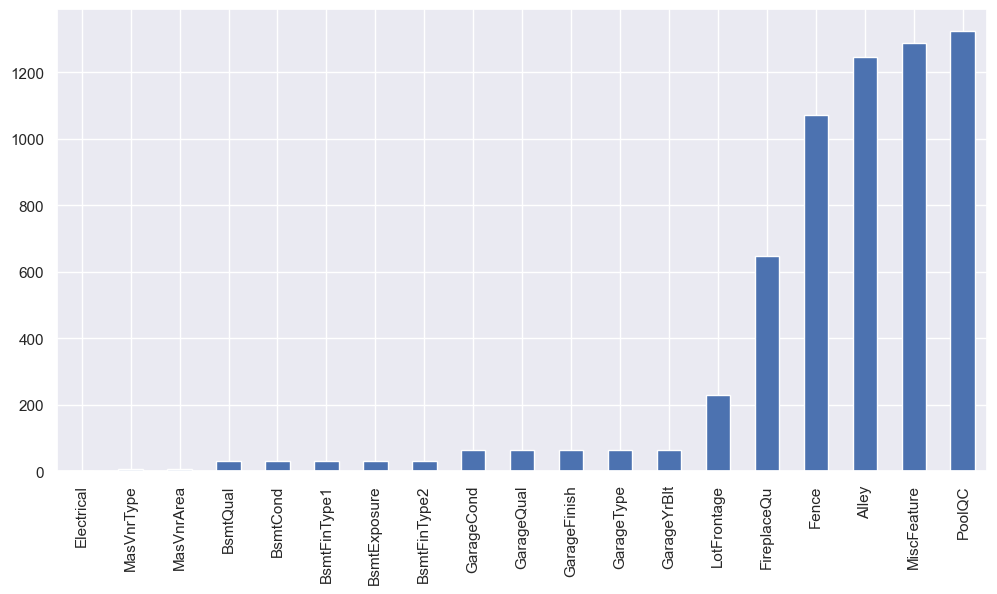

In [283]:
cols_w_null = train.isnull().sum()
cols_w_null = cols_w_null[cols_w_null > 0]
cols_w_null.sort_values(inplace=True)
cols_w_null.plot.bar(figsize = (12, 6))

### 첨도와 왜도 확인

In [284]:
for col in numerical_feats:
    print(f"{col:15} Skewness {train[col].skew():.2f} Kurtosis {train[col].kurt():.2f}")

Id              Skewness 0.01 Kurtosis -1.19
MSSubClass      Skewness 1.37 Kurtosis 1.49
LotFrontage     Skewness 1.59 Kurtosis 13.61
LotArea         Skewness 7.92 Kurtosis 127.53
OverallQual     Skewness 0.10 Kurtosis -0.13
OverallCond     Skewness 0.72 Kurtosis 1.20
YearBuilt       Skewness -0.57 Kurtosis -0.61
YearRemodAdd    Skewness -0.51 Kurtosis -1.28
MasVnrArea      Skewness 2.57 Kurtosis 10.54
BsmtFinSF1      Skewness 0.65 Kurtosis -0.51
BsmtFinSF2      Skewness 4.84 Kurtosis 26.59
BsmtUnfSF       Skewness 0.85 Kurtosis 0.23
TotalBsmtSF     Skewness 0.23 Kurtosis 1.11
1stFlrSF        Skewness 0.62 Kurtosis -0.17
2ndFlrSF        Skewness 0.75 Kurtosis -0.91
LowQualFinSF    Skewness 12.68 Kurtosis 168.93
GrLivArea       Skewness 0.57 Kurtosis 0.22
BsmtFullBath    Skewness 0.58 Kurtosis -0.93
BsmtHalfBath    Skewness 4.94 Kurtosis 25.02
FullBath        Skewness -0.05 Kurtosis -1.30
HalfBath        Skewness 0.67 Kurtosis -1.11
BedroomAbvGr    Skewness -0.16 Kurtosis 0.95
KitchenAb

In [285]:
for col in numerical_feats:
    skew_val = np.round(train[col].skew(),2)
    kurt_val = np.round(train[col].kurt(),2)
    if (abs(skew_val) > 1.00) | (abs(kurt_val) > 3.00): 
        print(f"{col:15} Skewness {skew_val} Kurtosis {kurt_val}")

MSSubClass      Skewness 1.37 Kurtosis 1.49
LotFrontage     Skewness 1.59 Kurtosis 13.61
LotArea         Skewness 7.92 Kurtosis 127.53
MasVnrArea      Skewness 2.57 Kurtosis 10.54
BsmtFinSF2      Skewness 4.84 Kurtosis 26.59
LowQualFinSF    Skewness 12.68 Kurtosis 168.93
BsmtHalfBath    Skewness 4.94 Kurtosis 25.02
KitchenAbvGr    Skewness 5.34 Kurtosis 31.81
WoodDeckSF      Skewness 1.37 Kurtosis 2.03
OpenPorchSF     Skewness 2.12 Kurtosis 6.82
EnclosedPorch   Skewness 3.02 Kurtosis 8.49
3SsnPorch       Skewness 11.12 Kurtosis 143.07
ScreenPorch     Skewness 4.28 Kurtosis 18.95
PoolArea        Skewness 25.85 Kurtosis 669.65
MiscVal         Skewness 31.25 Kurtosis 1066.14
SalePrice       Skewness 1.07 Kurtosis 1.36


## EDA

<AxesSubplot:>

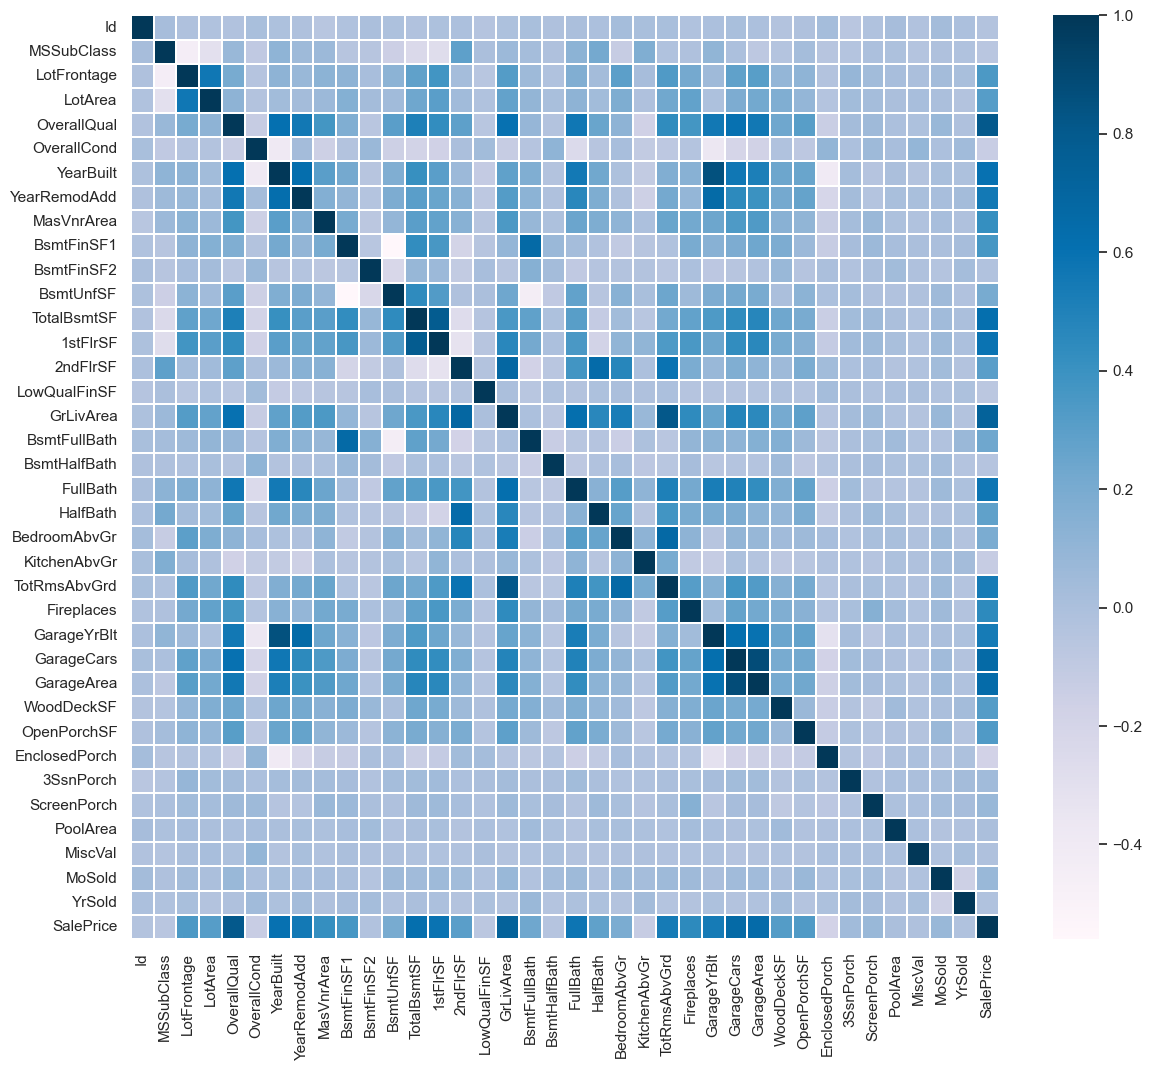

In [286]:
#수치형 데이터 분석 
corr_data = train[numerical_feats]
colormap = plt.cm.PuBu

f, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(corr_data.corr(), cmap=colormap, linewidth = 0.3)

In [287]:
k = 11
target_cols = corr_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
target_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'FullBath', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

<AxesSubplot:>

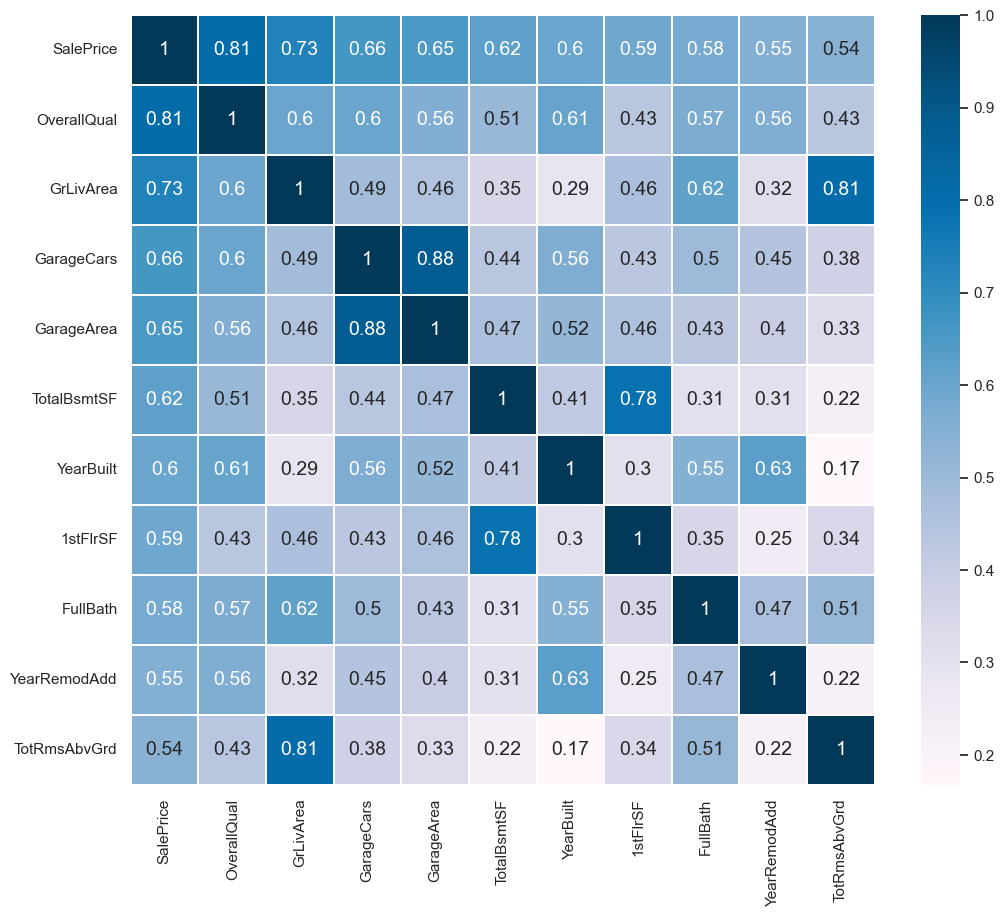

In [288]:
cm = np.corrcoef(train[target_cols].values.T)
f, ax =  plt.subplots(figsize = (12,10))
sns.heatmap(cm, annot = True, annot_kws = {'size': 14}, cmap = colormap, linewidth = 0.3, xticklabels = target_cols.values, yticklabels = target_cols.values)

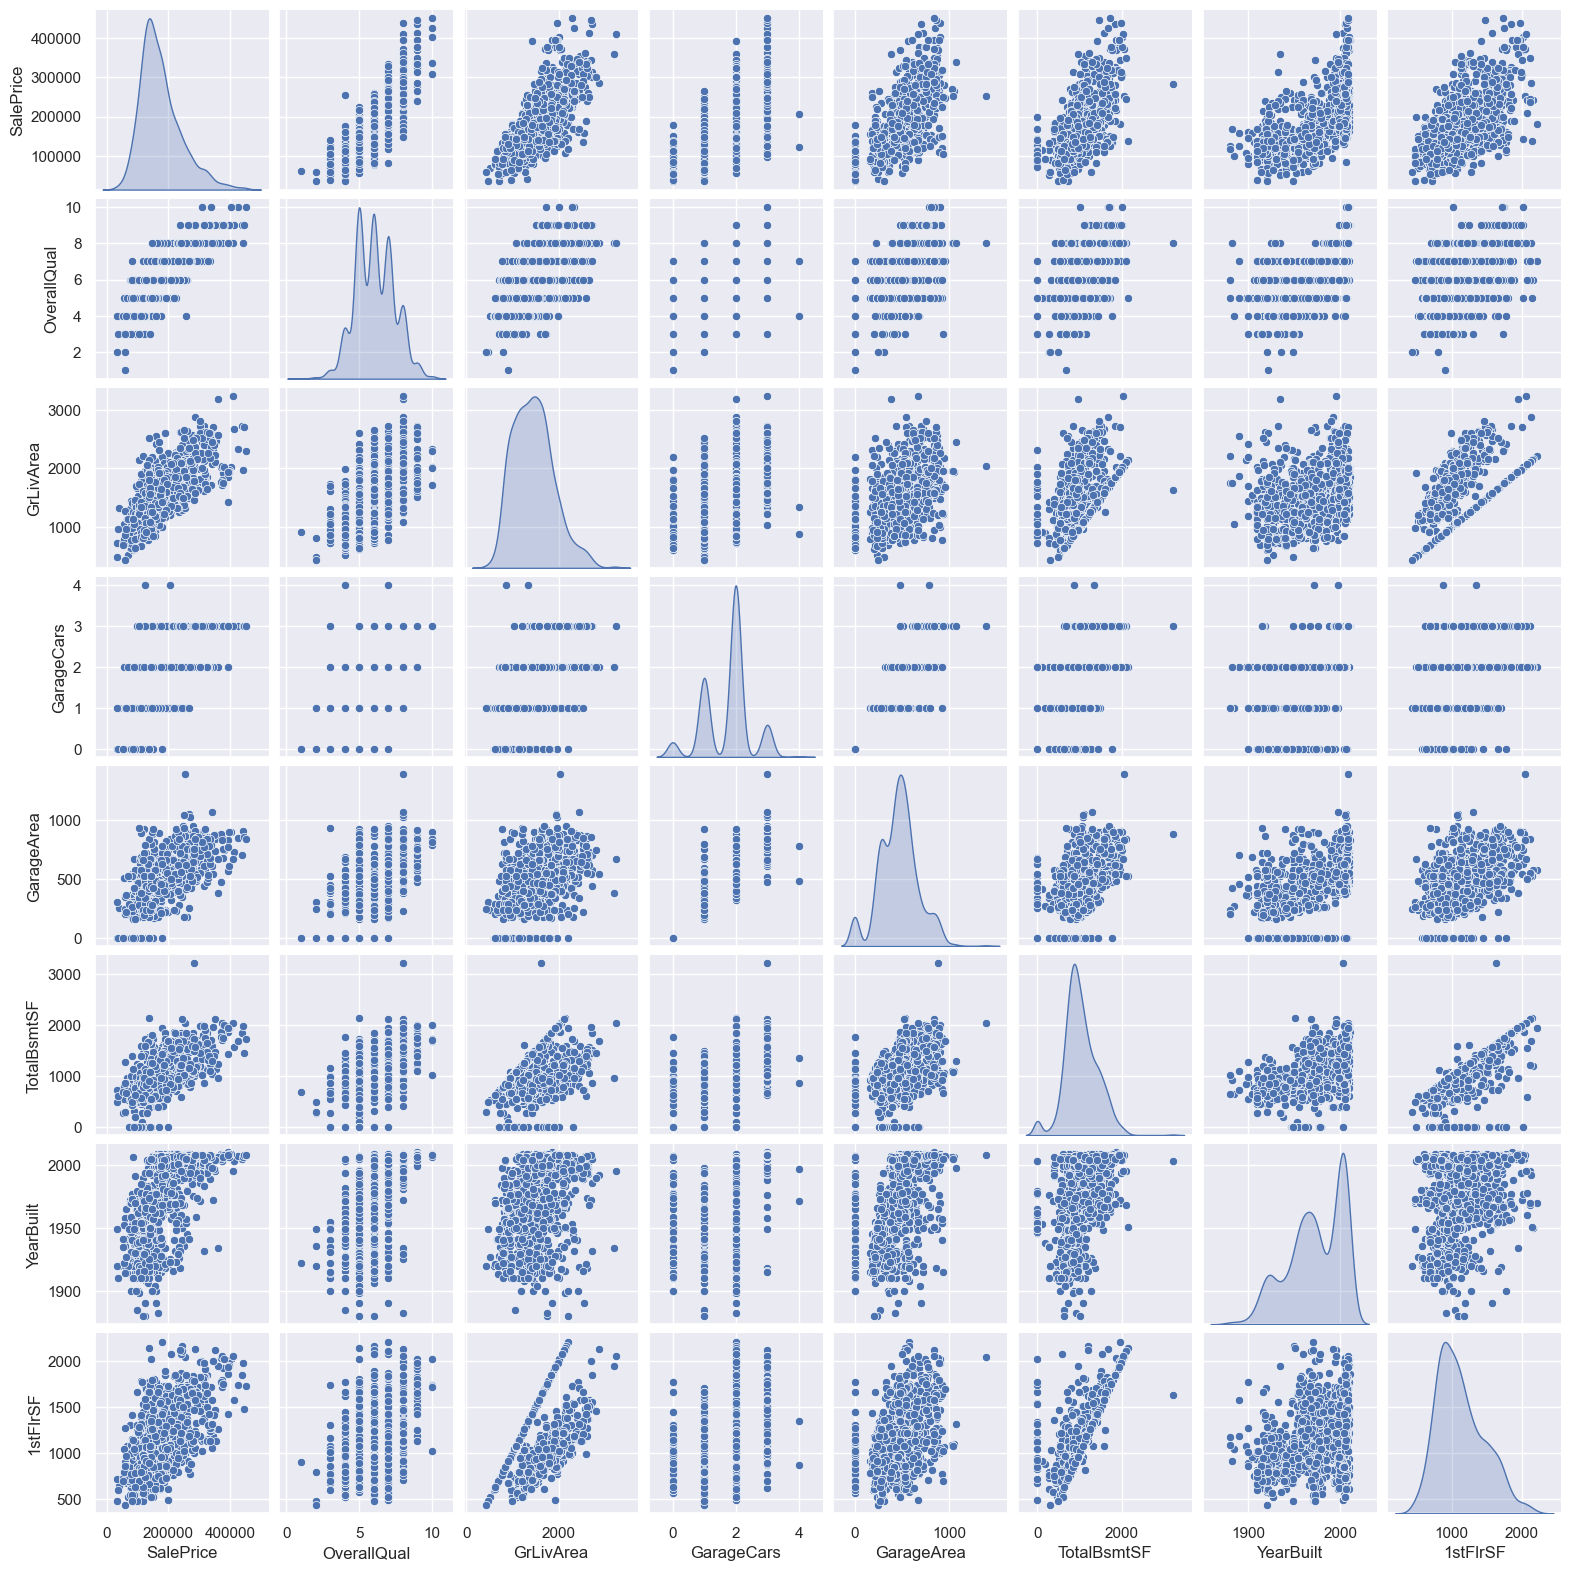

In [289]:
#SalePrice와 연관이 큰 OverallQual, GrLivArea, GarageCars,GarageArea, TotalBsmtSF, YearBuilt, 1stFirSF 에 대한 pair plot
n_target_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF']
sns.pairplot(train[n_target_cols], height = 2, kind = 'scatter', diag_kind = 'kde')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

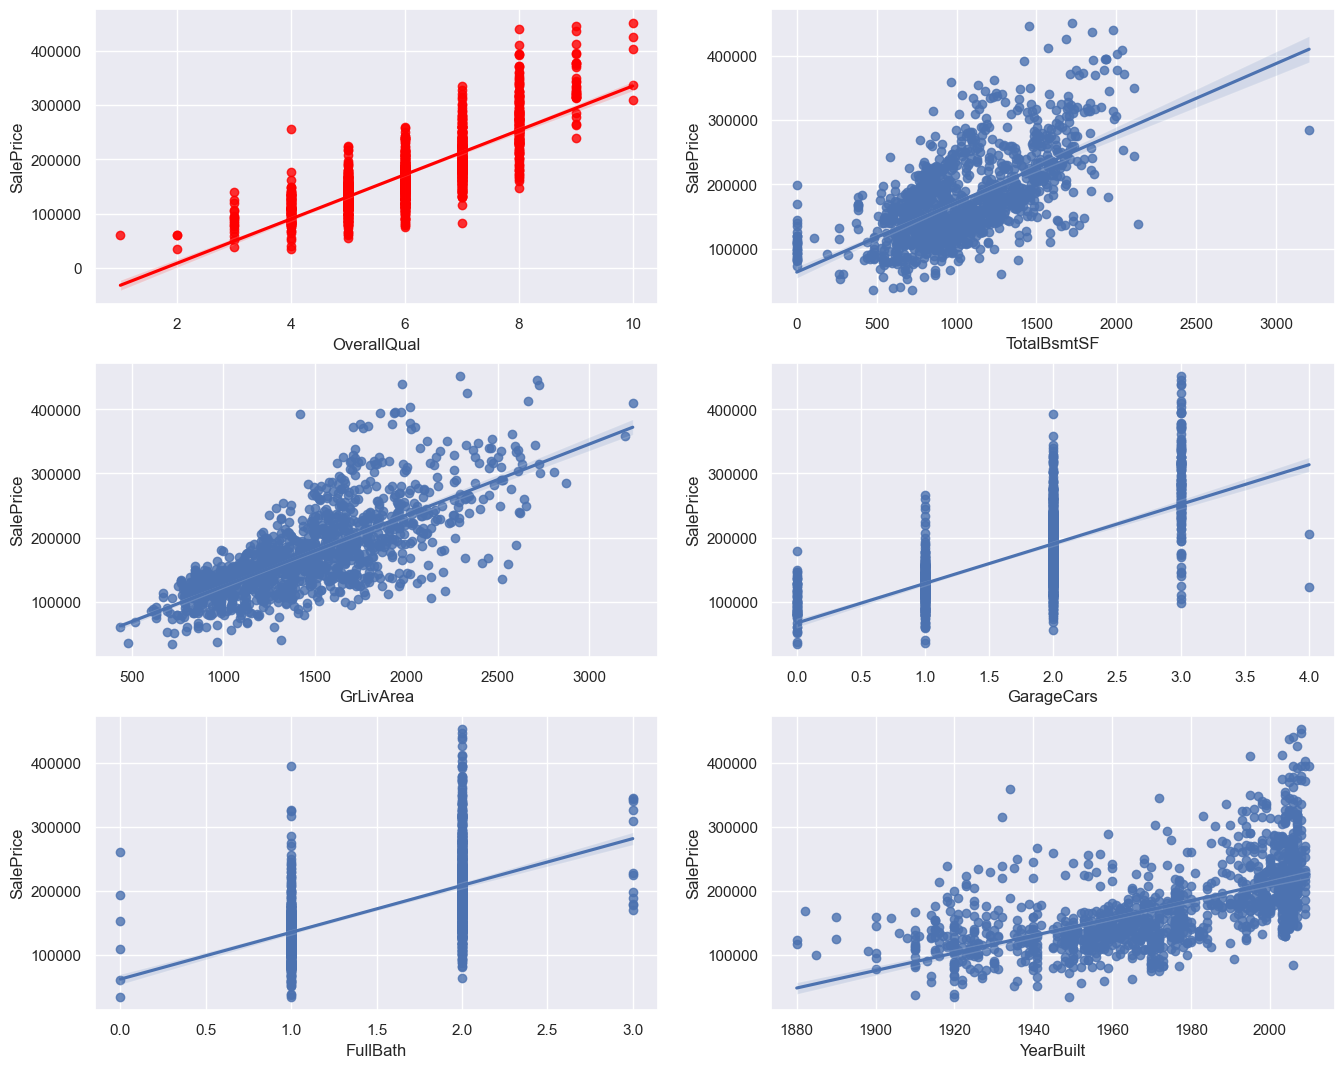

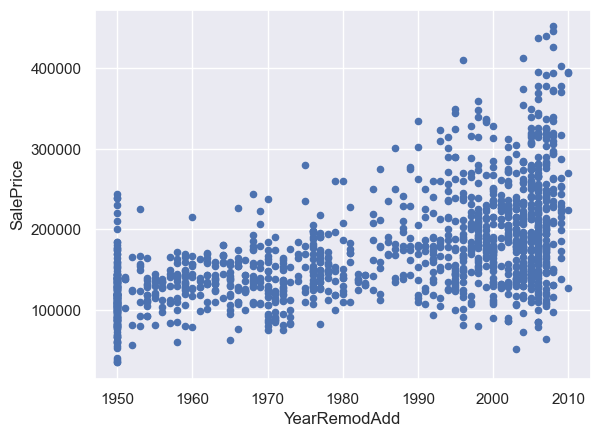

In [290]:
#regplot = 산점도, 회귀선, 신뢰 구간을 동시에 표현

fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))

OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1, color = 'red')
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageCars_scatter_plot = pd.concat([train['SalePrice'],train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

### 범주형 변수 탐색

In [291]:
for col in categorical_feats:
    print("***",col,"***")
    print(train[col].value_counts())

*** MSZoning ***
RL         1044
RM          196
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
*** Street ***
Pave    1323
Grvl       3
Name: Street, dtype: int64
*** Alley ***
Grvl    42
Pave    37
Name: Alley, dtype: int64
*** LotShape ***
Reg    852
IR1    436
IR2     31
IR3      7
Name: LotShape, dtype: int64
*** LandContour ***
Lvl    1201
Bnk      52
HLS      46
Low      27
Name: LandContour, dtype: int64
*** Utilities ***
AllPub    1326
Name: Utilities, dtype: int64
*** LotConfig ***
Inside     963
Corner     234
CulDSac     79
FR2         46
FR3          4
Name: LotConfig, dtype: int64
*** LandSlope ***
Gtl    1264
Mod      55
Sev       7
Name: LandSlope, dtype: int64
*** Neighborhood ***
NAmes      205
CollgCr    148
OldTown     93
Edwards     92
Somerst     85
Gilbert     79
Sawyer      68
NWAmes      66
NridgHt     66
BrkSide     56
SawyerW     54
Mitchel     46
Crawfor     43
IDOTRR      33
NoRidge     33
Timber      32
StoneBr     20
SWISU   

In [292]:
len(categorical_feats)

43

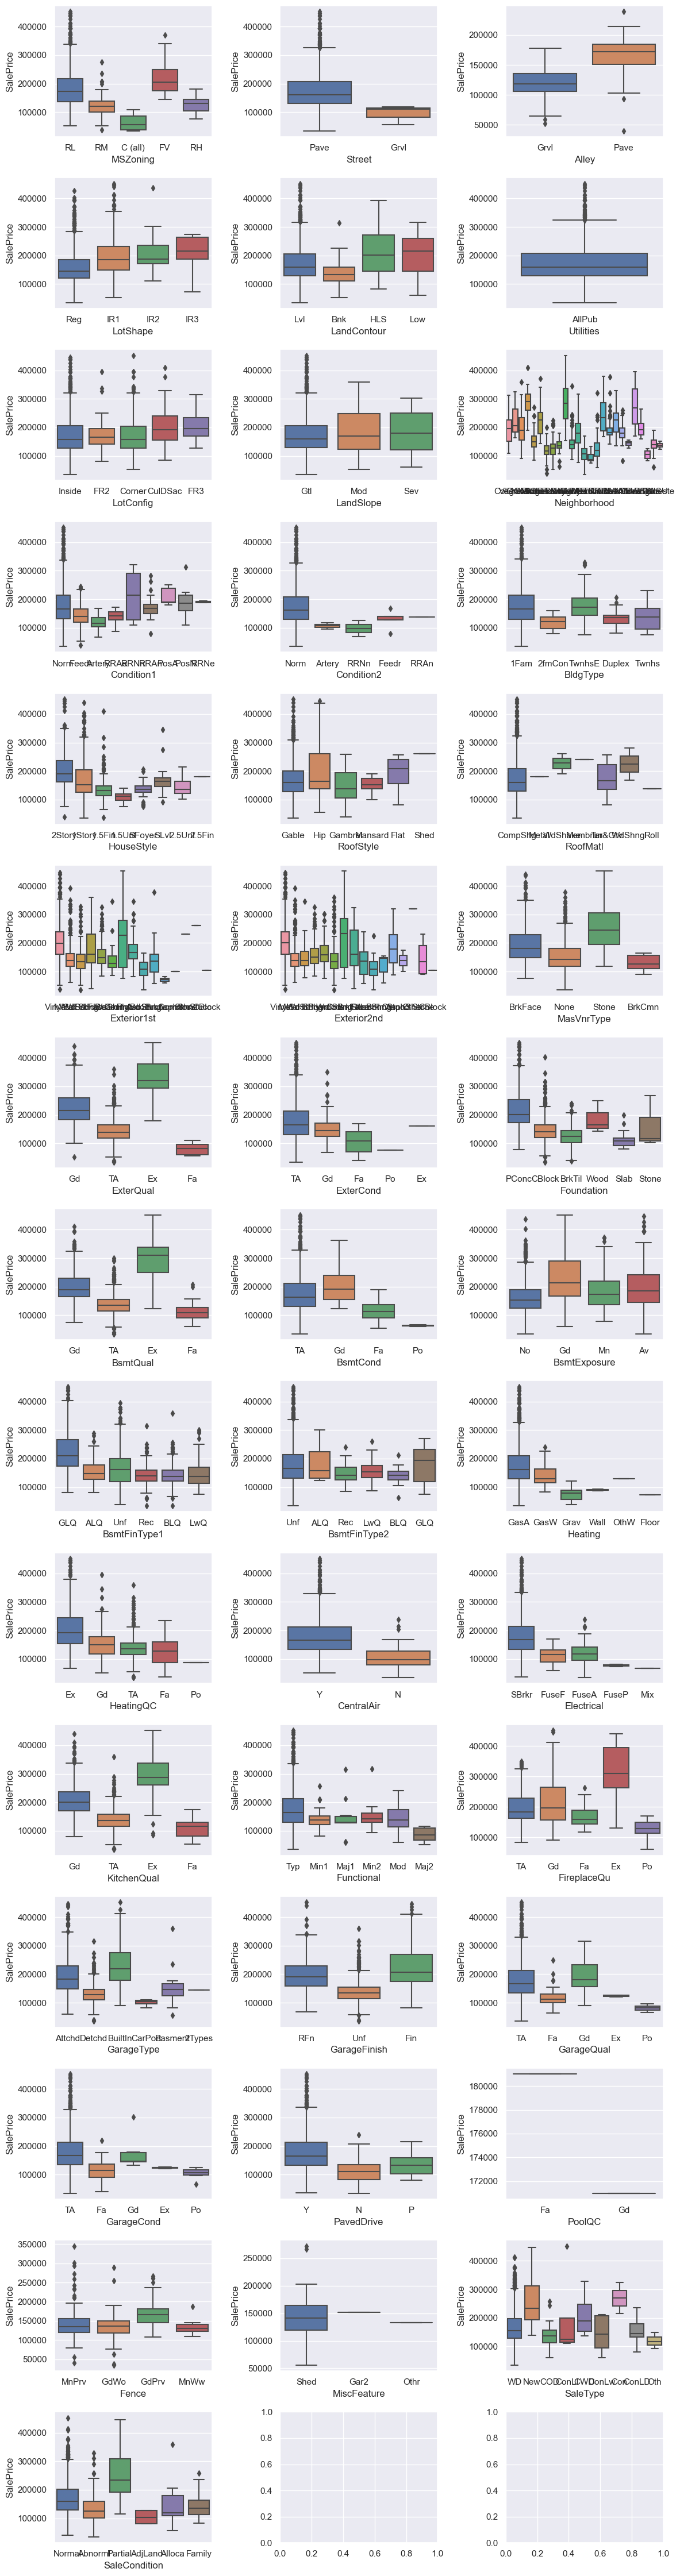

In [293]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=train["SalePrice"], data=train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

### Feature Engineering

Skewness: 1.068576
Kurtosis: 1.361245


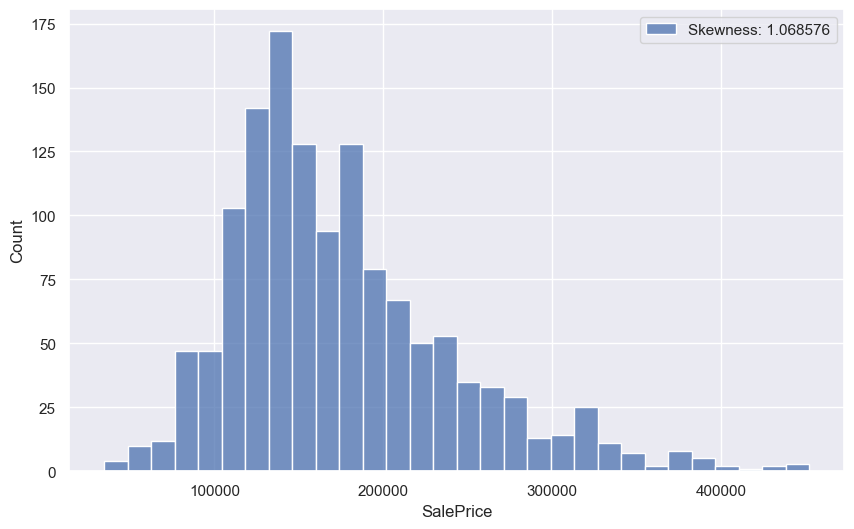

In [294]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.histplot(train["SalePrice"], color = "b", label="Skewness: {:2f}".format(train["SalePrice"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: -0.116626
Kurtosis: 0.537382


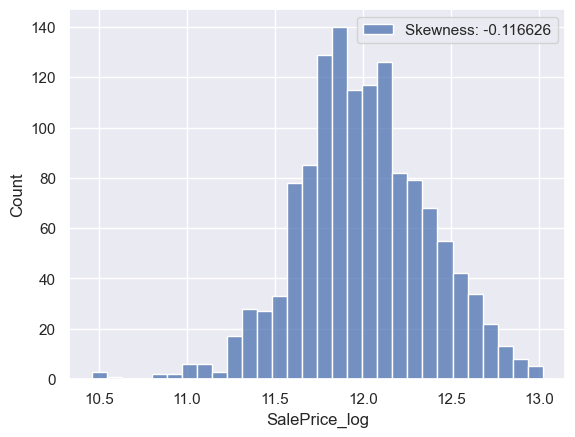

In [295]:
train['SalePrice_log'] = train['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.histplot(train['SalePrice_log'], color = "b", label="Skewness: {:2f}".format(train['SalePrice_log'].skew()))
g = g.legend(loc = "best")

print("Skewness: %f" % train['SalePrice_log'].skew())
print("Kurtosis: %f" % train['SalePrice_log'].kurt())

### 결측 데이터 처리

In [296]:
cols_w_null

Electrical         1
MasVnrType         6
MasVnrArea         6
BsmtQual          31
BsmtCond          31
BsmtFinType1      31
BsmtExposure      32
BsmtFinType2      32
GarageCond        65
GarageQual        65
GarageFinish      65
GarageType        65
GarageYrBlt       65
LotFrontage      228
FireplaceQu      646
Fence           1071
Alley           1247
MiscFeature     1288
PoolQC          1324
dtype: int64

MasVnrType, MasVnrArea  
BsmtQual, BsmtCond, BsmtFinType1  
BsmtExposure, BsmtFinType2  
GarageCond, GarageQual, GarageFinish, GarageType, GarageYrBlt  
FireplaceQu   
Fence  
Alley  
MiscFeature  
PoolQC    
위 value 들은 NaN이 결측치가 아니라 실제 "NOT EXIST"의 의미일 수 있음

In [297]:
cols_tofill = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
'BsmtExposure', 'BsmtFinType2',
'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt',
'FireplaceQu',
'Fence',
'Alley',
'MiscFeature',
'PoolQC']

In [298]:
for col in cols_tofill:
    train[col].fillna("None", inplace=True)
    test[col].fillna("None", inplace=True) #test에서도 처리!

In [299]:
#결측치의 처리 정도 확인
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,228,0.171946
Electrical,1,0.000754
KitchenAbvGr,0,0.000000
GarageFinish,0,0.000000
GarageYrBlt,0,0.000000


이제 수치형 특성 중에서 결측치가 남아있는 특성은?

In [300]:
#확인
for col in numerical_feats:
    if train[col].isnull().sum() != 0:
        print(col)

LotFrontage


In [301]:
#위 특성의 결측치는 평균값으로 채워보자 
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)

범주형 특성을 확인

In [302]:
#확인
for col in categorical_feats:
    if train[col].isnull().sum() != 0:
        print(col)

Electrical


In [303]:
#위 특성의 결측치는 일단 none으로 채워보자 
train['Electrical'].fillna("None", inplace = True)

test 데이터도 처리해줘야함!

In [304]:
for col in test_cols_w_null:
    if test[col].isnull().sum() != 0:
        print(col)

MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageCars
GarageArea
SaleType


In [305]:
#위 특성의 결측치는 평균값으로 채워보자 
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)

채워줘야 하는 값 
- MSZoning 
- Utilities 
- Exterior1st, Exterio2nd => 일단 Other로 채움?
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath, BsmtHalfBath, TotalBsmtSF: basement가 없어서 결측치인 것 같으니 0으로 채움?
- KitchenQual
- Functional
- GarageCars, GarageArea: basement 항목처럼 처리
- SaleType: 일단 Oth	Other로 처리?

In [306]:
test[test['BsmtFinSF1'].isnull()]['BsmtExposure']

660    None
Name: BsmtExposure, dtype: object

In [307]:
#basement가 없는 것이므로 0으로 채움
Bsmt_null = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF']

for col in Bsmt_null:
    test[col].fillna("None", inplace = True)

In [308]:
test[test['GarageCars'].isnull()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [309]:
test[test['GarageCars'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2007,WD,Alloca


In [310]:
#garage 특성은 일단 평균으로 채움 
test['GarageCars'].fillna(test['GarageCars'].mean(), inplace = True)
test['GarageArea'].fillna(test['GarageArea'].mean(), inplace = True)

<AxesSubplot:xlabel='Functional', ylabel='Count'>

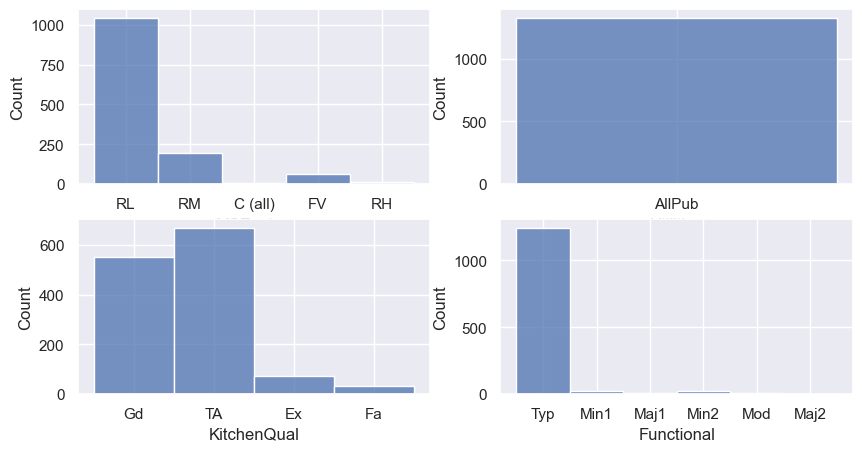

In [311]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.histplot(train['MSZoning'], ax = ax[0][0])
sns.histplot(train['Utilities'], ax = ax[0][1])
sns.histplot(train['KitchenQual'], ax = ax[1][0])
sns.histplot(train['Functional'], ax = ax[1][1])


<AxesSubplot:xlabel='SaleType', ylabel='Count'>

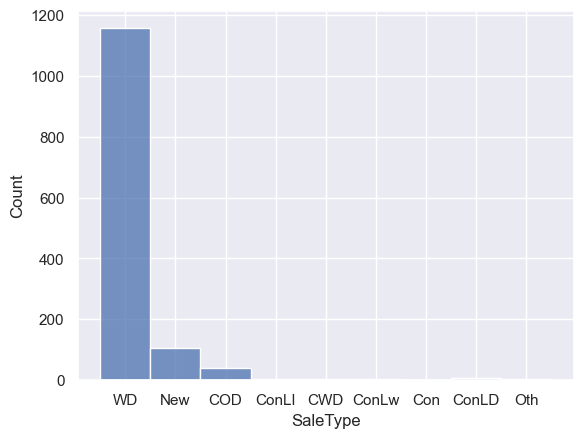

In [312]:
sns.histplot(train['SaleType'])

In [313]:
#각 카테고리마다 최빈값으로 채워봄
test['MSZoning'].fillna("RL", inplace = True)
test['Utilities'].fillna("AllPub", inplace = True)
test['KitchenQual'].fillna("TA", inplace = True)
test['Functional'].fillna("Typ", inplace = True)
test['SaleType'].fillna("WD", inplace = True)

In [314]:
for col in test_cols_w_null:
    if test[col].isnull().sum() != 0:
        print(col)

Exterior1st
Exterior2nd


In [315]:
test[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal


In [316]:
test['Exterior1st'].fillna("Other", inplace = True)
test['Exterior2nd'].fillna("Other", inplace = True)

### Categorical Data 수치형 변환

In [317]:
#for catg in categorical_feats:
#    sns.violinplot(x=catg, y=train["SalePrice_log"], data=train)
#    plt.show()

In [318]:
for catg in categorical_feats :
    g = train.groupby(catg)["SalePrice_log"].mean()
    print(g)

MSZoning
C (all)    10.960733
FV         12.246616
RH         11.700602
RL         12.060377
RM         11.671297
Name: SalePrice_log, dtype: float64
Street
Grvl    11.407962
Pave    12.003740
Name: SalePrice_log, dtype: float64
Alley
Grvl    11.654336
None    12.014619
Pave    11.985372
Name: SalePrice_log, dtype: float64
LotShape
IR1    12.137510
IR2    12.195977
IR3    12.175993
Reg    11.924777
Name: SalePrice_log, dtype: float64
LandContour
Bnk    11.759983
HLS    12.207694
Low    12.149231
Lvl    12.001723
Name: SalePrice_log, dtype: float64
Utilities
AllPub    12.002392
Name: SalePrice_log, dtype: float64
LotConfig
Corner     11.997003
CulDSac    12.183876
FR2        12.037126
FR3        12.195684
Inside     11.986351
Name: SalePrice_log, dtype: float64
LandSlope
Gtl    12.000562
Mod    12.044601
Sev    12.001134
Name: SalePrice_log, dtype: float64
Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.704644
ClearCr    12.276068
CollgCr    12.

In [319]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [320]:
#일부 특성만 골라서 반영을 해보자 
#selected_cate_feats = ['MSZoning', 'Street', 'Alley', 'BldgType', 'MasVnrType', 'ExterQual', 'Foundation','BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageFinish', 'PavedDrive','Fence', 'SaleType','SaleCondition']
selected_cate_feats =  ['MSZoning', 'Street', 'ExterQual', 'BsmtQual', 'PavedDrive']

In [321]:
#범주형 변수 특성 반영하는 칼럼 생성
for df in [train, test]:
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(['RL', 'RM'])), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(['FV', 'RH'])), 'MSZ_num'] = 3

    df['Str_num'] = 1
    df.loc[(df['Street'] == 'Pave'), 'Str_num'] = 2

    df['EQ_num'] = 1
    df.loc[(df['ExterQual'] == 'Gd'),'EQ_num'] = 2
    df.loc[(df['ExterQual'] == 'TA'), 'EQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Fa'), 'EQ_num'] = 4

    df['BQ_num'] = 1
    df.loc[(df['BsmtQual'].isin(['Gd', 'TA'])), 'BQ_num'] = 2
    df.loc[(df['BsmtQual'].isin(['None', 'Fa'])), 'BQ_num'] = 3

    df['PD_num'] = 1
    df.loc[(df['PavedDrive']== 'N'), 'PD_num'] = 2
    df.loc[(df['PavedDrive']== 'P'), 'PD_num'] = 3

In [322]:
plt.figure(figsize = (10, 8))
colormap = plt.cm.PuBu
tmp_train = train[['MSZ_num', 'Str_num', 'EQ_num', 'BQ_num', 'PD_num']]

<Figure size 1000x800 with 0 Axes>

In [323]:
tmp_train.head()

,MSZ_num,Str_num,EQ_num,BQ_num,PD_num
0,2,2,2,2,1
1,2,2,3,2,1
2,2,2,2,2,1
3,2,2,3,2,1
4,2,2,2,2,1


<AxesSubplot:>

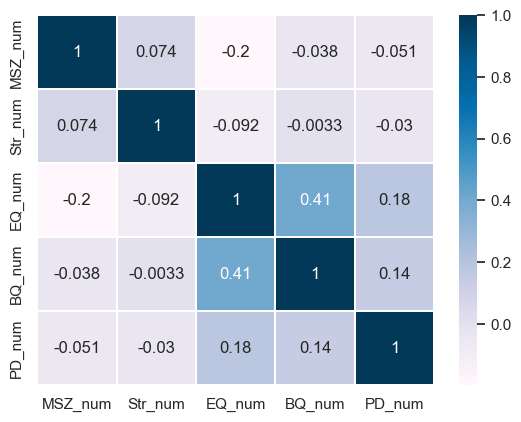

In [324]:
sns.heatmap(tmp_train.corr(), linewidths = 0.1, annot = True, annot_kws = {'size':12}, cmap = colormap)

In [325]:
#훈련에 사용할 특성을 골라보자 
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [326]:
train.drop(categorical_feats, axis = 1, inplace = True)

In [327]:
test.drop(categorical_feats, axis = 1, inplace = True)

In [328]:
train.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'], axis = 1, inplace = True)

In [349]:
train.drop('TotalBsmtSF', axis = 1, inplace = True)

In [329]:
id_test = test['Id'] #for submission 

test.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'], axis = 1, inplace = True)

In [351]:
train.drop(["SalePrice"], axis = 1, inplace = True)
train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath',
       'GarageCars', 'SalePrice_log', 'MSZ_num', 'Str_num', 'EQ_num', 'BQ_num',
       'PD_num'],
      dtype='object')

In [350]:
test.drop('TotalBsmtSF', axis = 1, inplace = True)
test.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath',
       'GarageCars', 'MSZ_num', 'Str_num', 'EQ_num', 'BQ_num', 'PD_num'],
      dtype='object')

In [352]:
test_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'FullBath', 'GarageCars']

#Totalbtsm에 None 값이 있어서 훈련에 문제가 있었음 
for i in range(len(test)):
    for w in test_features:
        if test.loc[i][w] == 'None':
            print(test.loc[i])
            break

In [353]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = train.drop("SalePrice_log", axis = 1).values
target_label = train["SalePrice_log"].values
X_test = test.values

In [354]:
X_train.shape

(1326, 11)

In [355]:
X_test.shape

(1459, 11)

In [356]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)

### 모델링

In [203]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [357]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(X_tr,y_tr)

[17:04:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ntrhead" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4603,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1.8,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, ntrhead=-1, num_parallel_tree=1, predictor='auto',
             random_state=7, reg_alpha=0, ...)

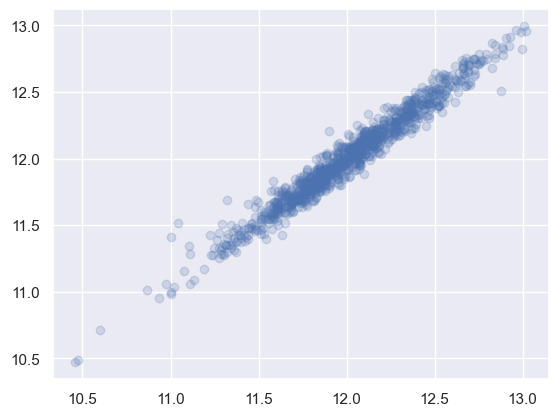

In [358]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)

In [359]:
regressor.score(X_tr, y_tr)

0.9593853781298239

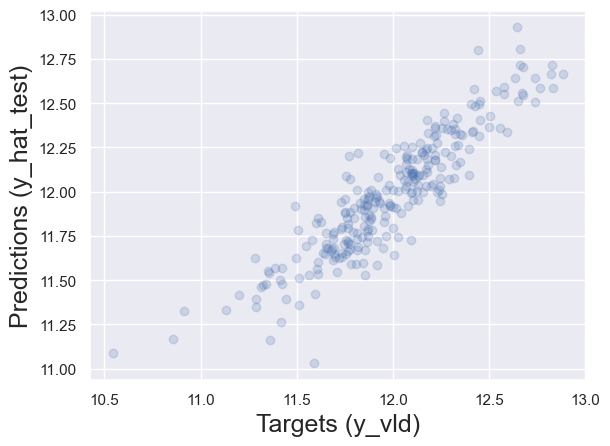

In [360]:
y_hat_test = regressor.predict(X_vld)
plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [361]:
regressor.score(X_vld,y_vld)

0.8206793493691376

In [342]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 10)

[16:57:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ntrhead" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ntrhead" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ntrhead" } might not be used.

  This could be a fa

In [362]:
print(accuracies.mean())
print(accuracies.std())

0.8276066439710602
0.035514508394153606


In [237]:
for i in X_test:
    if type(i) == 'str':
        print(i)
        break

In [363]:
use_logvals = 1

pred_xgb = regressor.predict(X_test)

sub_xgb = pd.DataFrame()
sub_xgb['Id'] = id_test
sub_xgb['SalePrice'] = pred_xgb

if use_logvals == 1:
    sub_xgb['SalePrice'] = np.exp(sub_xgb['SalePrice']) 

sub_xgb.to_csv('xgb.csv',index=False)